# Data visualization using **seaborn**

Seaborn is a Python visualization library based on matplotlib. 

* It provides a high-level interface for drawing attractive statistical graphics. 
* https://seaborn.pydata.org


## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import seaborn
import seaborn as sns

# we are using the inline backend
%matplotlib inline 

## First Examples

From https://seaborn.pydata.org/tutorial/introduction.html

Example datasets: https://github.com/mwaskom/seaborn-data

Tips dataset: https://github.com/mwaskom/seaborn-data/blob/master/tips.csv

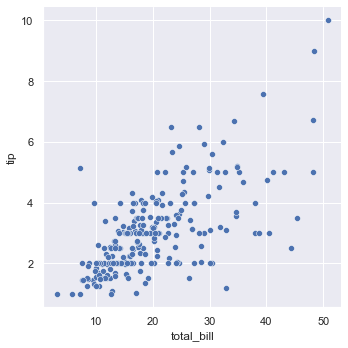

In [2]:
# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip"
)

The `hue` arguments allows you to express a third dimension of information using color.

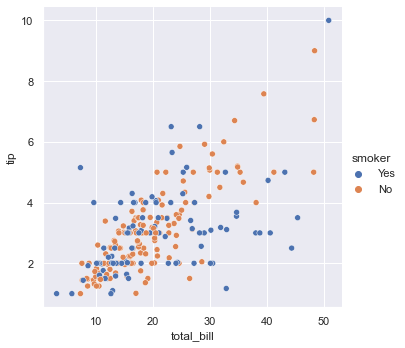

In [3]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", 
    hue="smoker"
)

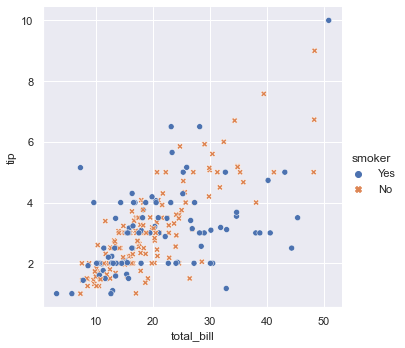

In [4]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", 
    hue="smoker", style="smoker"
)

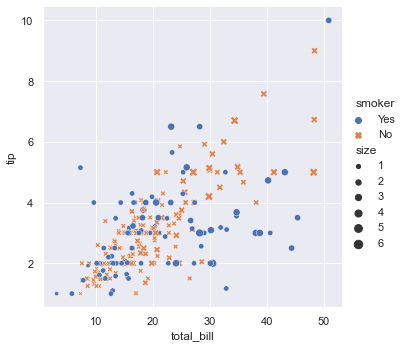

In [5]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip",
    hue="smoker", style="smoker", size="size"
)

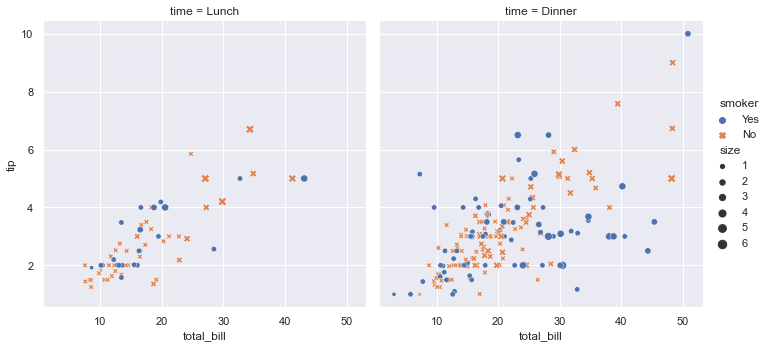

In [6]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

Seaborn provides built in **datasets**. They are available here:

https://github.com/mwaskom/seaborn-data 

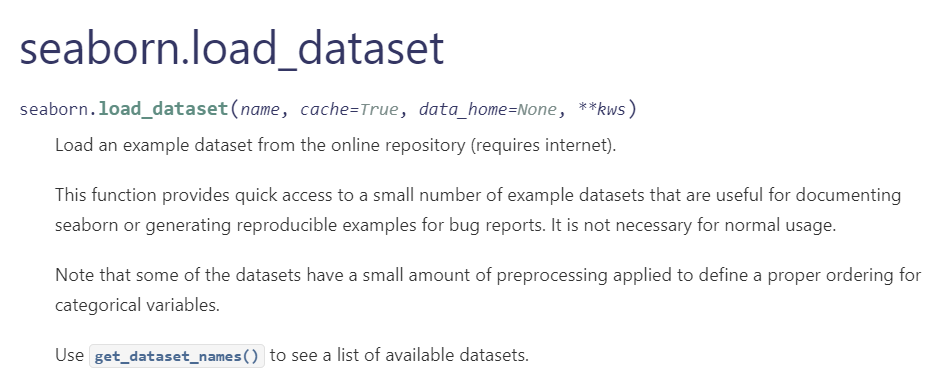

In [7]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [8]:
# We will also be using other datasets for the examples that follow
dots = sns.load_dataset("dots")
penguins = sns.load_dataset("penguins")
car_crashes = sns.load_dataset('car_crashes')
iris = sns.load_dataset("iris")
flights = sns.load_dataset("flights")

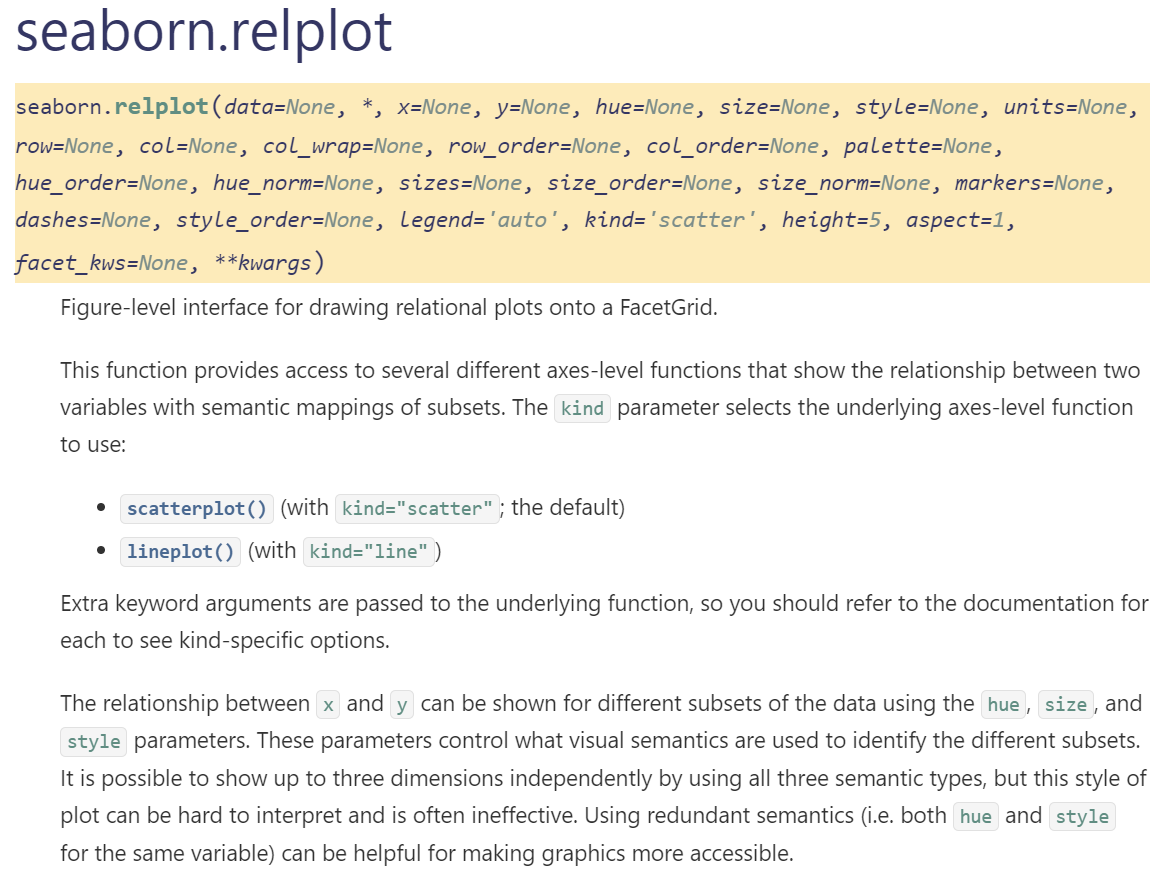

The function `relplot()` is designed to visualize many different statistical relationships.

https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

The parameter `kind` allows changing the type of vizualization (from scatter to line for instance).

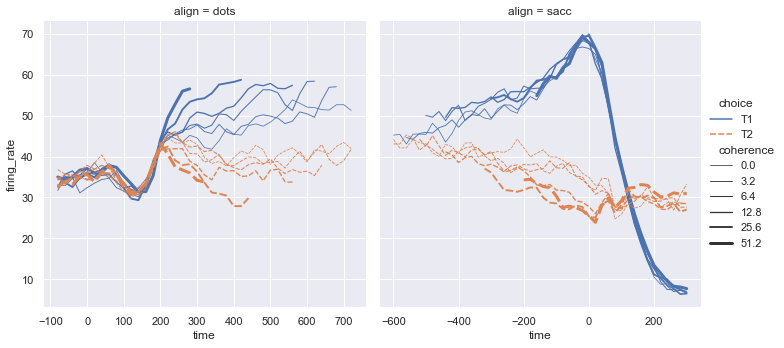

In [9]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

## Regression Plots

The two functions that can be used to visualize a linear fit are:

`regplot()`
https://seaborn.pydata.org/generated/seaborn.regplot.html


`lmplot()`
https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot

See also the tutorial on regression: https://seaborn.pydata.org/tutorial/regression.html

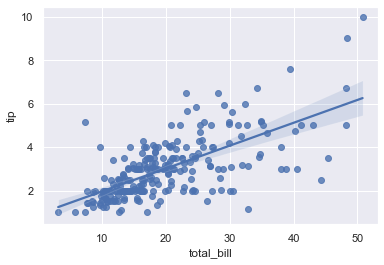

In [10]:
sns.regplot(data=tips, x="total_bill", y="tip");

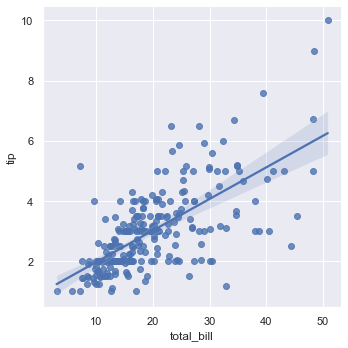

In [11]:
sns.lmplot(data=tips, x="total_bill", y="tip");

**Note:**

https://seaborn.pydata.org/generated/seaborn.regplot.html

The `regplot()` and `lmplot()` functions are closely related, but the former is an axes-level function while the latter is a figure-level function that combines regplot() and FacetGrid.

We will use `lmplot()` function for the examples below.

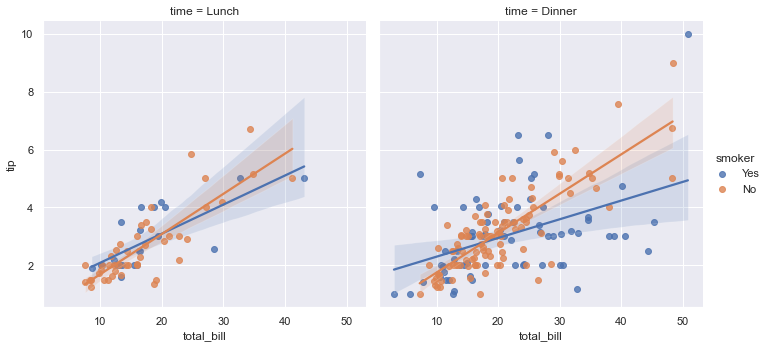

In [12]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

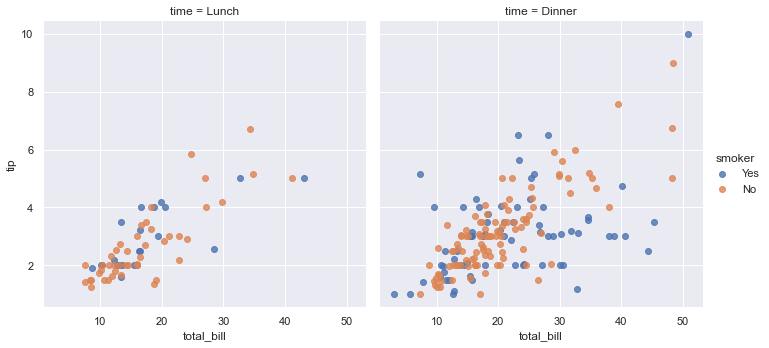

In [13]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker", fit_reg=False)
plt.show()

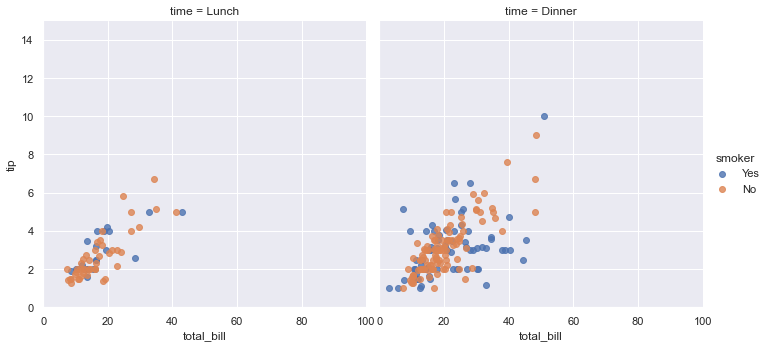

In [14]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker", fit_reg=False)

plt.ylim(0, 15)
plt.xlim(0, 100)
plt.show()

In [15]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 720x864 with 0 Axes>

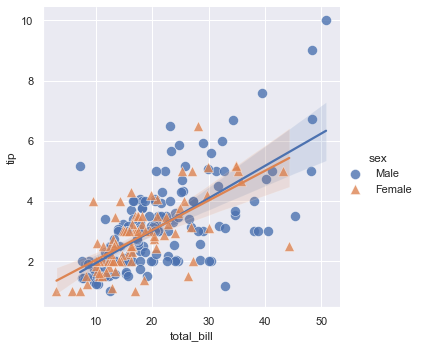

In [16]:
plt.figure(figsize=(10,12))

# We can plot a regression plot studying whether total bill effects the tip
# hue is used to show separation based on categorical data 'sex'
# Define different markers for men and women
# You can effect the scatter plot by passing in a dictionary for styling of markers
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex', markers=['o', '^'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})

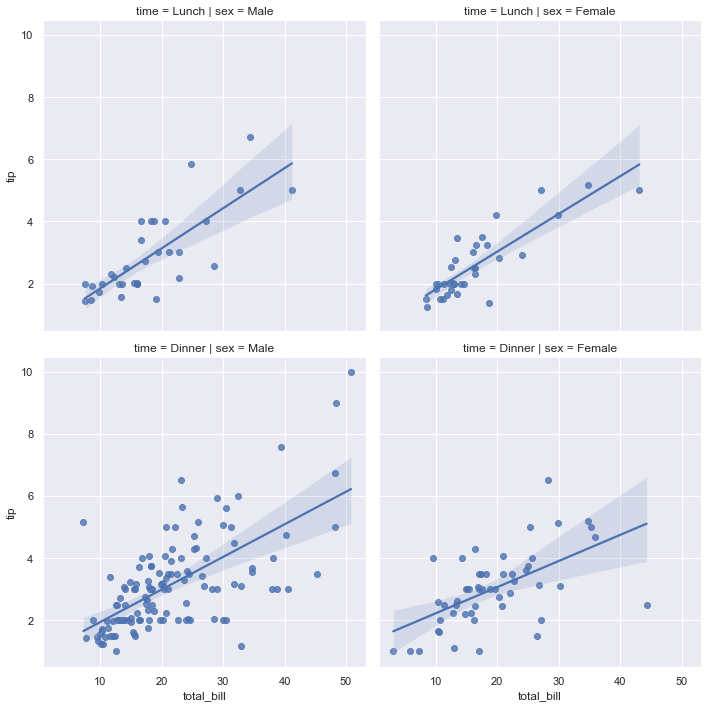

In [17]:
# You can separate the data into separate columns for day data
sns.lmplot(data=tips, x='total_bill', y='tip', col='sex', row='time')

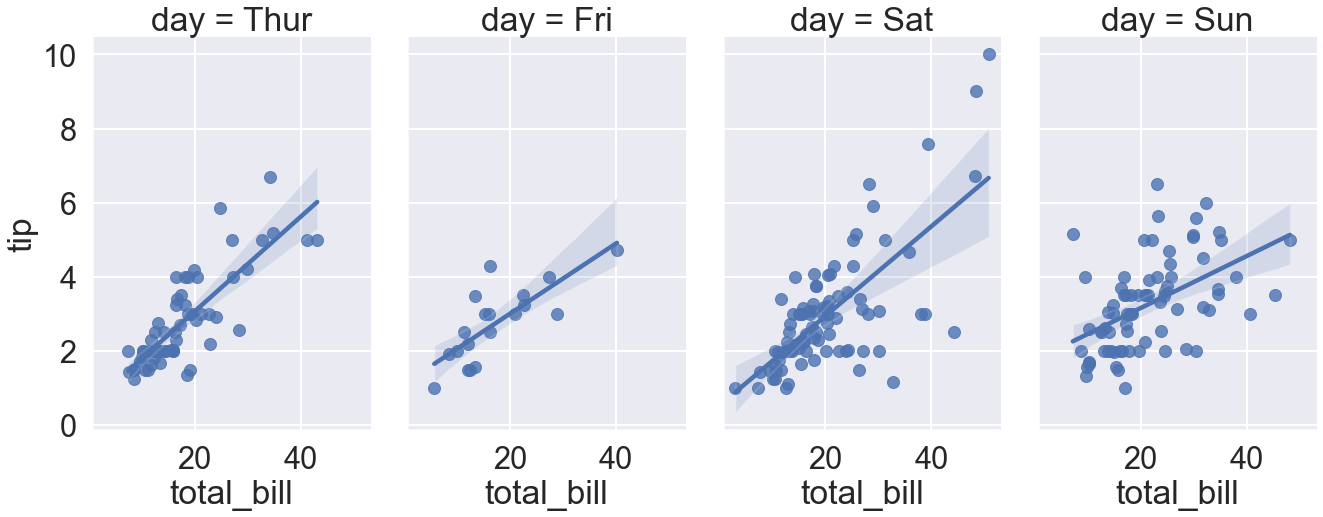

In [18]:
# Makes the fonts more readable
sns.set_context('poster', font_scale=1.4)

sns.lmplot(data=tips, x='total_bill', y='tip', col='day', height=8, aspect=0.6) # try to add: hue="sex"

## Distribution Plots

https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

In [19]:
# Apply the default theme
sns.set_theme()

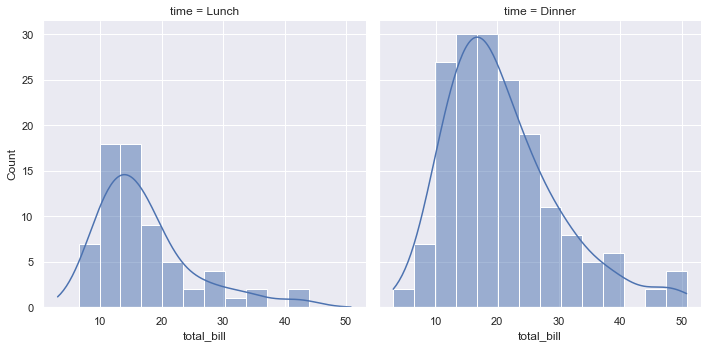

In [20]:
# kdeplot: Plot univariate or bivariate distributions using kernel density estimation.
sns.displot(data=tips, x="total_bill", col="time", kde=True)

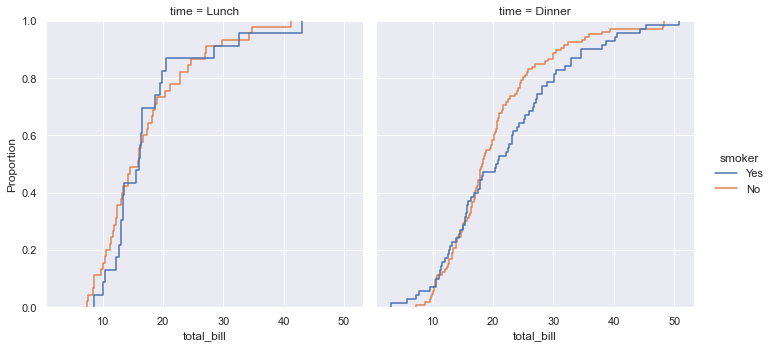

In [21]:
# ecdfplot: Plot empirical cumulative distribution functions.
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker")

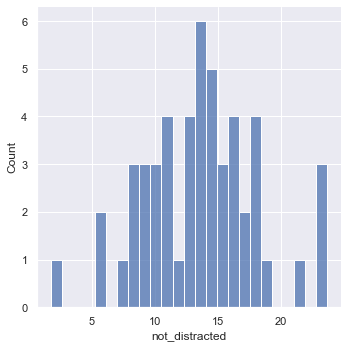

In [22]:
# A univeriate distribution provides a distribution for one variable
# Kernal Density Estimation with a Histogram is provided
# kde=False removes the KDE
sns.displot(car_crashes['not_distracted'], kde=False, bins=25)

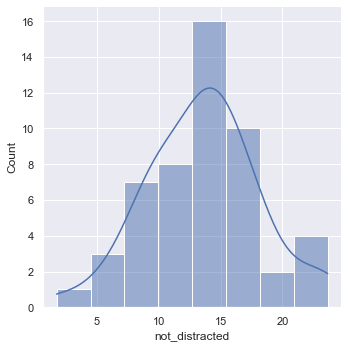

In [23]:
sns.displot(data=car_crashes, x="not_distracted", kde=True)

## Joint Plots

Joint plot compares 2 distributions and plots a scatter plot by default:

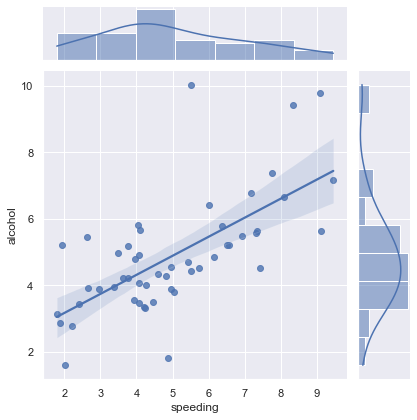

In [24]:
# kind='reg': create a regression line 
# Check: kind='kde'; kind='hex'
sns.jointplot(x='speeding', y='alcohol', data=car_crashes, kind='reg')

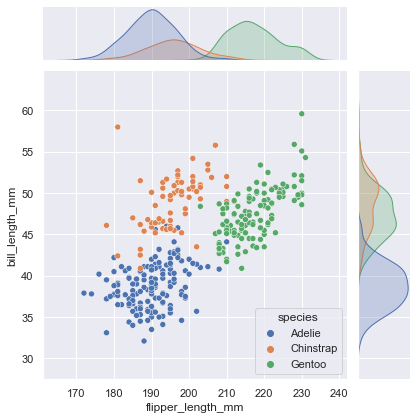

In [25]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

## Pair Plots

Plots relationships across the entire data frames numerical values

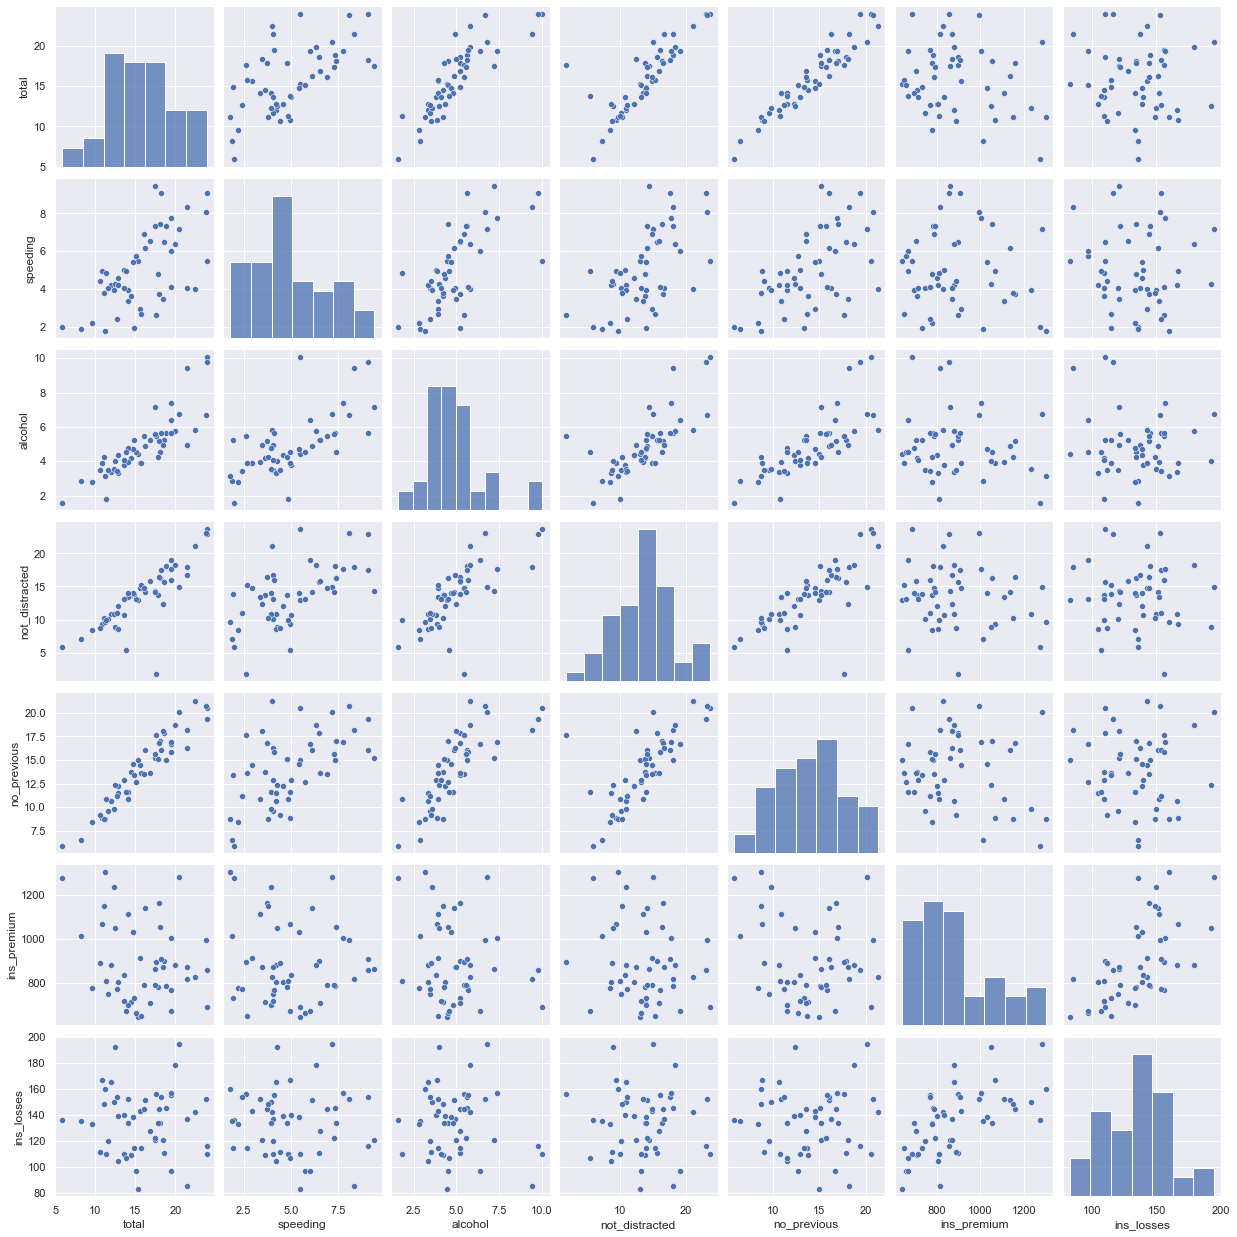

In [26]:
# Pair Plot plots relationships across the entire data frames numerical values
sns.pairplot(car_crashes)

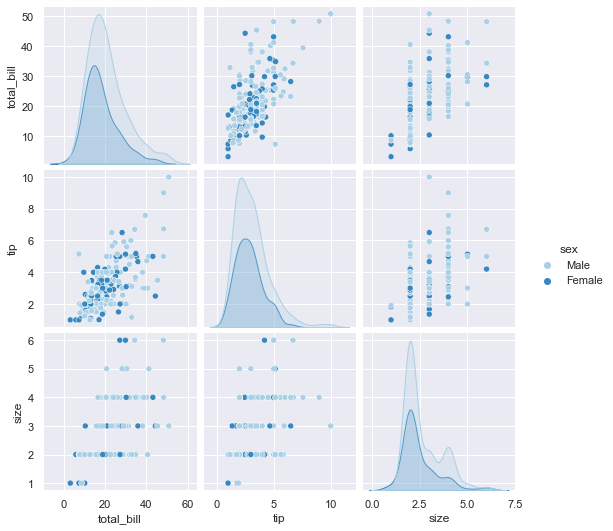

In [27]:
# With hue you can pass in a categorical column to add color 
# You can use color maps from Matplotlib to define what colors to use
sns.pairplot(data=tips, hue='sex', palette='Blues')

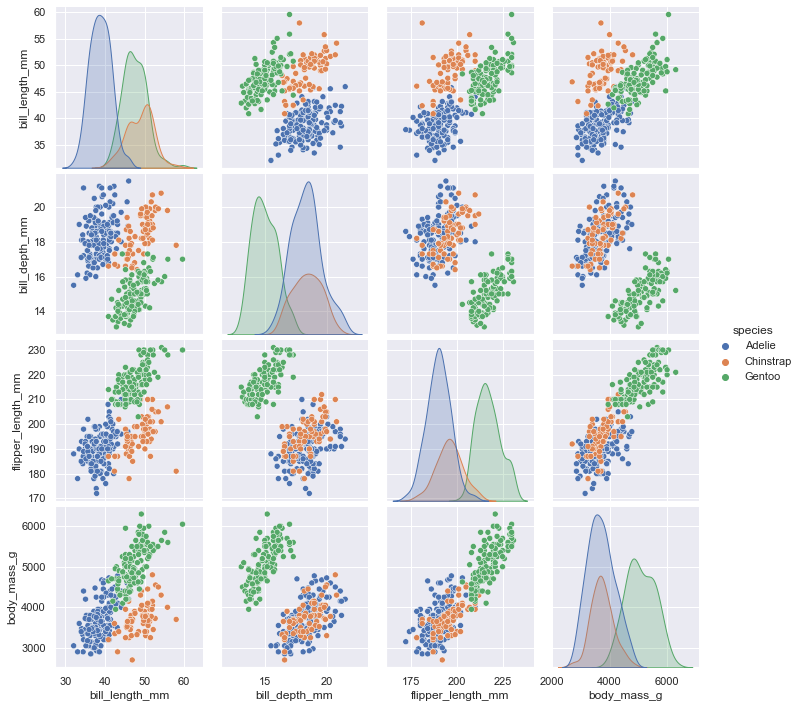

In [28]:
sns.pairplot(data=penguins, hue="species")

## Plotting Categorical Data

 **“swarm” plot**: a scatter plot that adjusts the positions of the points along the categorical axis so that they don’t overlap:

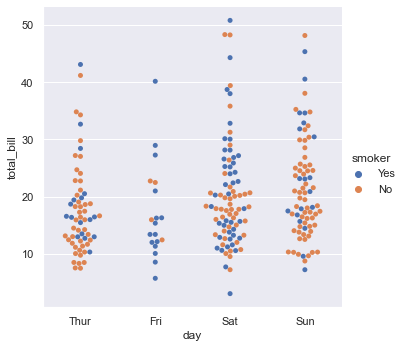

In [29]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")
plt.show()

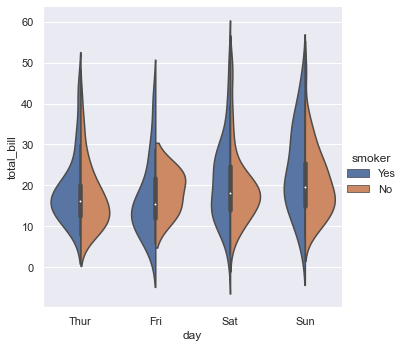

In [30]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

## Different Plots with Seaborn

**Bar Plots**

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

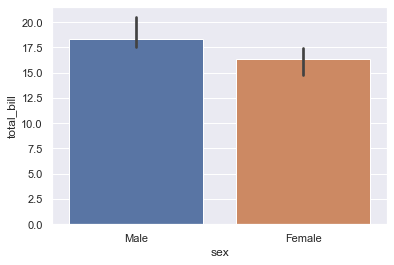

In [31]:
# Aggregate categorical data based on a function (mean is the default)
# Estimate total bill amount based on sex
# With estimator you can define functions to use other than the mean like those
# provided by NumPy : median, std, var, cov or make your own functions
sns.barplot(x='sex', y='total_bill',data=tips, estimator=np.median)

**Count Plots**

<AxesSubplot:xlabel='sex', ylabel='count'>

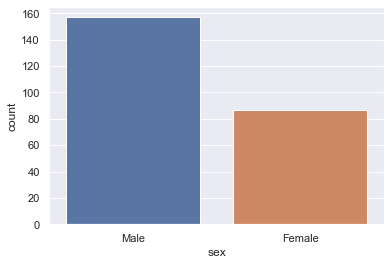

In [32]:
# A count plot is like a bar plot, but the estimator is counting the number of occurances
sns.countplot(x='sex',data=tips)

**Box Plots**

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

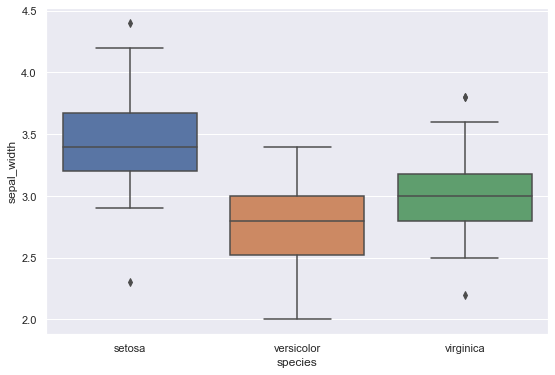

In [33]:
# Boxplot for iris dataset
plt.figure(figsize=(9,6)) # Set plot dimensions
sns.boxplot(data=iris, x='species', y='sepal_width')

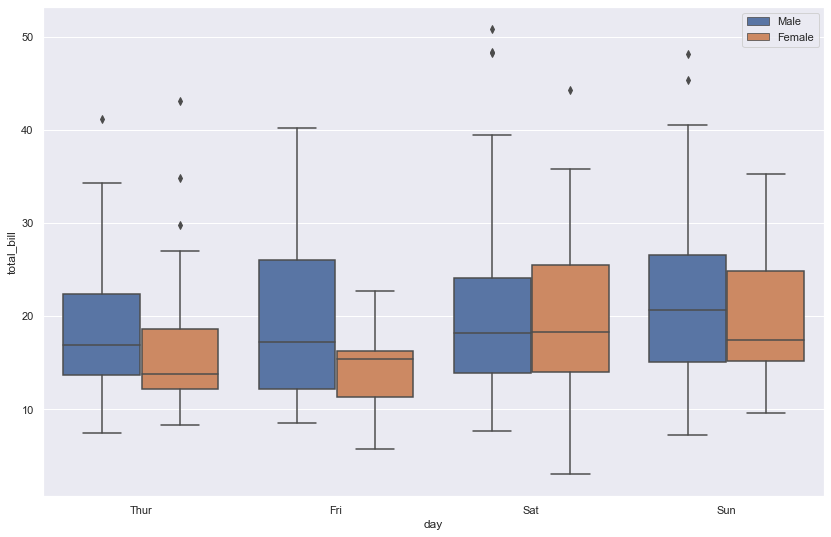

In [34]:
# You can use figure sizing from Matplotlib
plt.figure(figsize=(14,9))

# Hue can add another category being sex
sns.boxplot(x='day', y='total_bill', data=tips, hue='sex')

# Moves legend to the best position
plt.legend(loc=0)

**Violin Plots**

Violin plots are useful alternatives to box plots.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

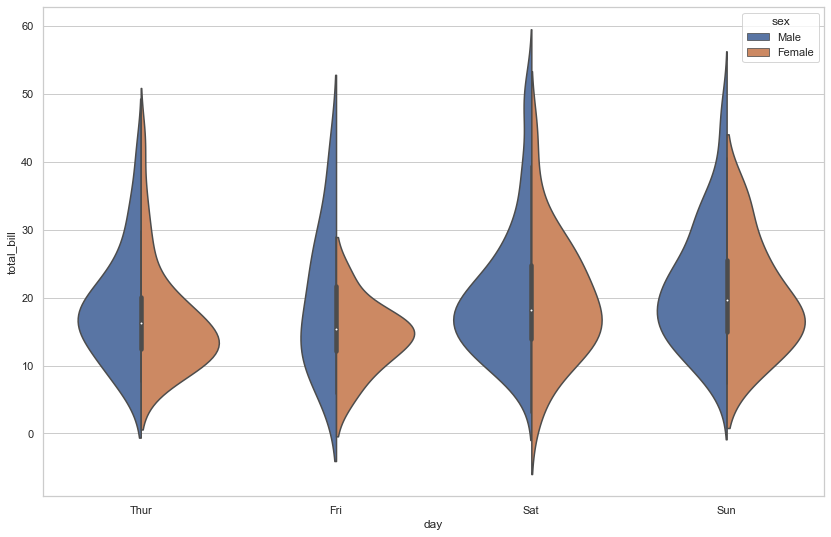

In [35]:
# Violin Plot is a combination of the boxplot and KDE
# While a box plot corresponds to data points, the violin plot uses the KDE estimation of the data points
# Split allows you to compare how the categories compare to each other

sns.set_style("whitegrid")

plt.figure(figsize=(14,9))

sns.violinplot(x='day', y='total_bill', data=tips, hue='sex',split=True)

**Strip Plots**

<AxesSubplot:xlabel='day', ylabel='total_bill'>

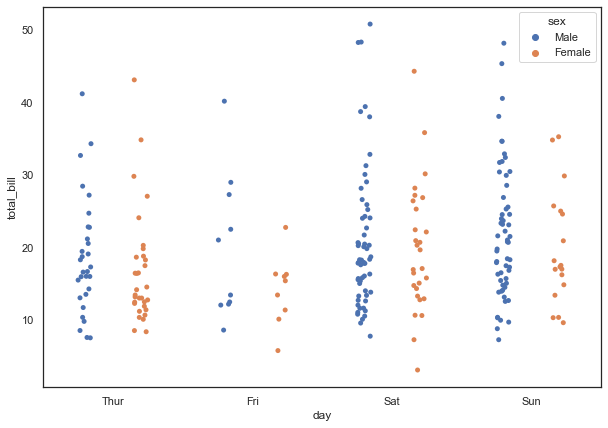

In [36]:
# The strip plot draws a scatter plot representing all data points where one variable is categorical. 
# It is often used to show all observations with a box plot that represents the average distribution.
# Hue breaks data into men and women
# Dodge separates the men and women data

plt.figure(figsize=(10,7))

sns.set_theme(style="white", palette=None)

sns.stripplot(x='day', y='total_bill', data=tips,  
              hue='sex', dodge=True)

**Swarm Plots**

<AxesSubplot:xlabel='day', ylabel='total_bill'>

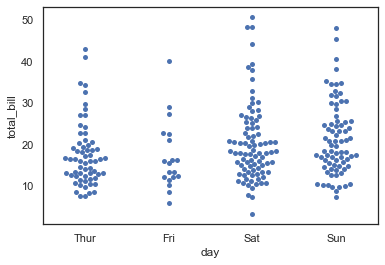

In [37]:
# A swarm plot is like a strip plot, but points are adjusted so they don't overlap
# It looks like a combination of the violin and strip plots

sns.swarmplot(x='day', y='total_bill', data=tips)

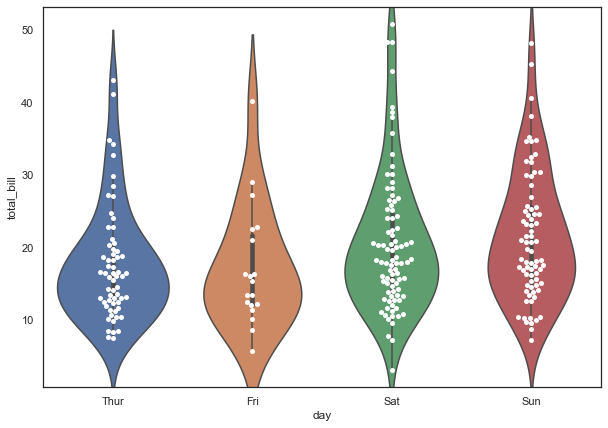

In [38]:
plt.figure(figsize=(10,7))

# You can stack a violin plot with a swarm
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='white')

plt.show()

## Palettes

There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks.

Seaborn figure styles: https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles

You can use Matplotlib color maps for color styling: https://matplotlib.org/stable/tutorials/colors/colormaps.html

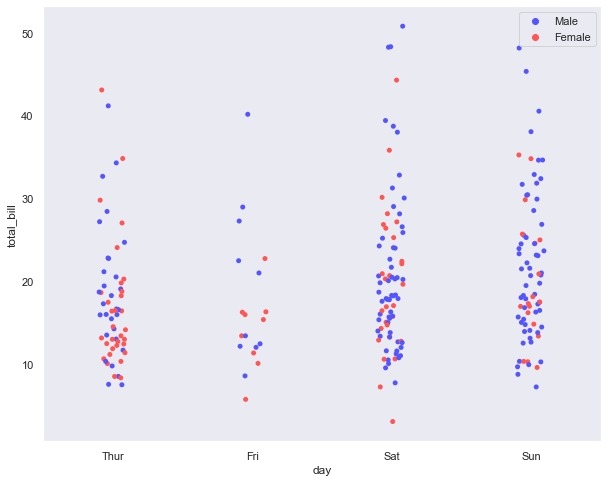

In [39]:
plt.figure(figsize=(10,8))

sns.set_style('dark')
#sns.set_context('talk')

sns.stripplot(x='day',y='total_bill',data=tips, hue='sex', 
             palette='seismic')

# Add the optional legend with a location number (best: 0, upper right: 1, upper left: 2, lower left: 3, lower right: 4) or supply a tuple of x & y from lower left
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.legend(loc=0)
plt.show()

<AxesSubplot:xlabel='island', ylabel='body_mass_g'>

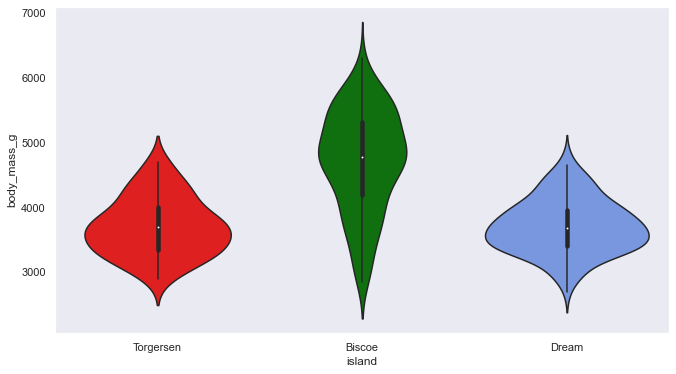

In [40]:
plt.figure(figsize=(11,6)) # Set plot dimensions
my_colors = ['red',  
             'green',
             '#6890F0']

sns.violinplot(data=penguins, x="island", y="body_mass_g", palette=my_colors)

## Matrix Plots

**Heatmaps**

To create a heatmap, the data must be set up as a matrix where variables are on the columns and rows.


<AxesSubplot:>

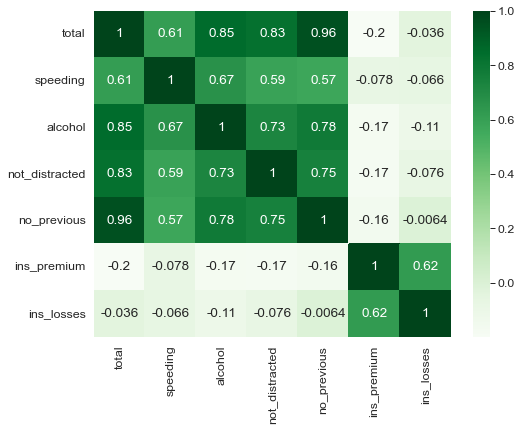

In [41]:
plt.figure(figsize=(8,6))

sns.set_context('paper', font_scale=1.4)

# Get the data as matrix
crashes_mx = car_crashes.corr(numeric_only=True)

# Create the heatmap, add annotations and a color map
sns.heatmap(crashes_mx, annot=True, cmap='Greens')

Correlation tells you how influential a variable is on the result. So, we see that n previous accident is heavily correlated with accidents, while the insurance premium is not.


<AxesSubplot:xlabel='year', ylabel='month'>

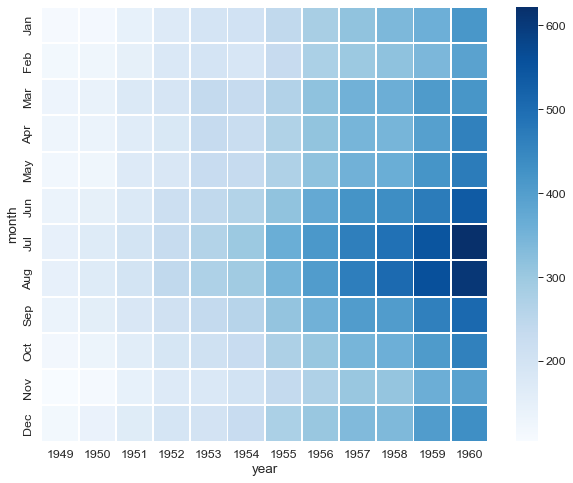

In [42]:
plt.figure(figsize=(10,8))
sns.set_context('paper', font_scale=1.4)

# For the flights dataset, we can create a matrix with an index of month, columns representing years
# and the number of passengers for each
flights_pt = flights.pivot_table(index='month', columns='year', values='passengers')

sns.heatmap(flights_pt, cmap='Blues', linecolor='white', linewidth=1)

We see that flights have increased over time and that most people travel in July and August.

**<p style="color:red">EXERCISE 1</p>**

Using different Seaborn plots, check the correlation between different penguin characteristics. 

* Use the dataset penguins from Seaborn.
* Check the correlation between flipper length and body mass. Use linear regression plots to make predictions.
* Check the correlation between body mass and bill length. Differentiate data based on sex attribute and create one plot per species. 
* Create a heatmap for the penguins data.
* Check this article and verify the ideas presented using seaborn: https://www.linkedin.com/pulse/penguin-paradox-garima-anand/

In [43]:
# Your solution here...



## Pair Grids

You can create a grid of different plots with complete control over what is displayed.

https://seaborn.pydata.org/generated/seaborn.PairGrid.html

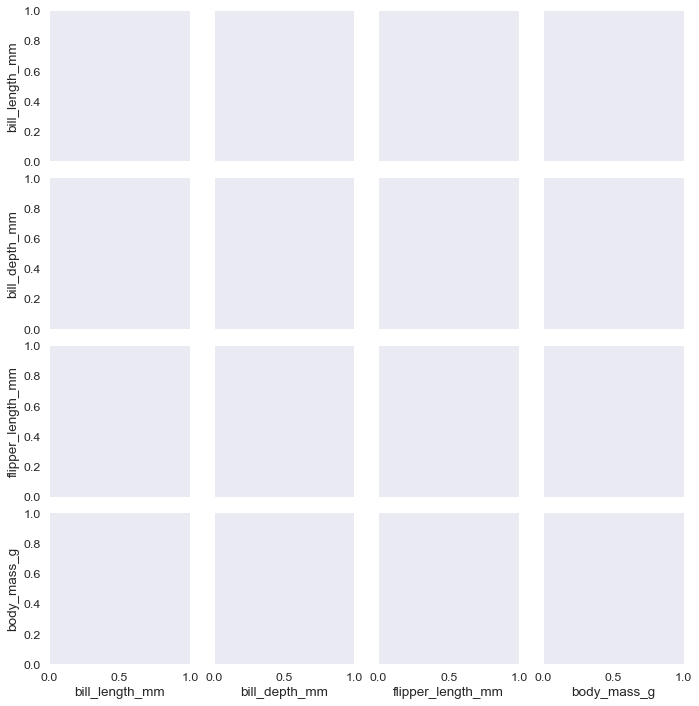

In [43]:
# Calling the constructor sets up a blank grid of subplots with each row and one column corresponding to a numeric variable in the dataset.
g = sns.PairGrid(penguins)

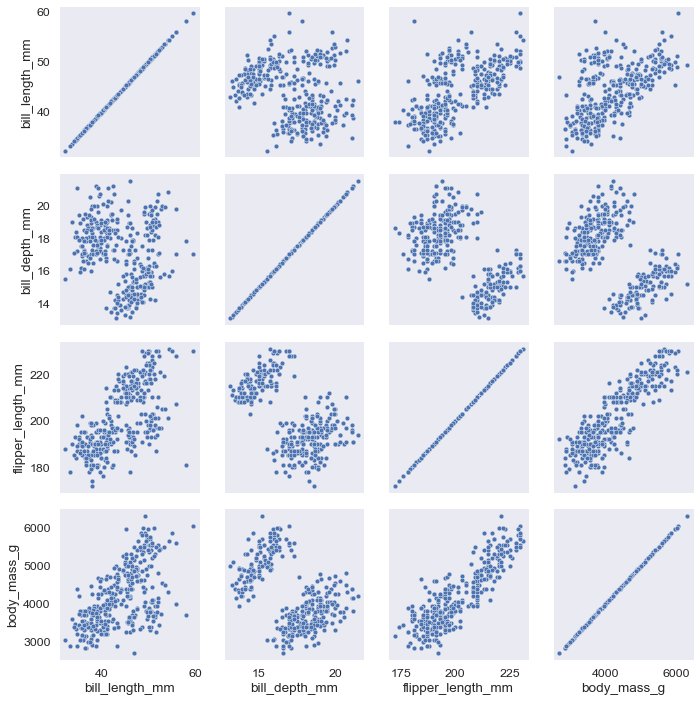

In [44]:
g = sns.PairGrid(penguins)
g.map(sns.scatterplot)

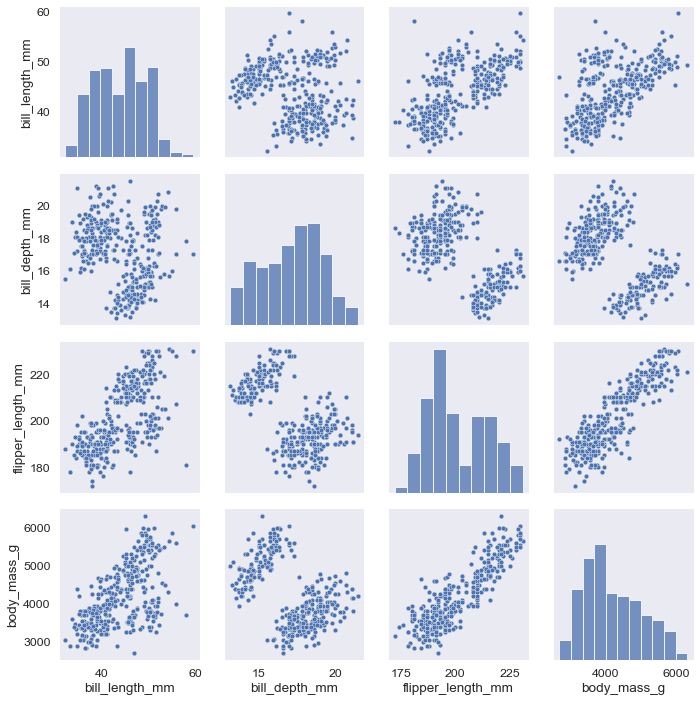

In [45]:
g = sns.PairGrid(penguins)
# Put a histogram on the diagonal 
g.map_diag(sns.histplot)
# And a scatter plot everywhere else 
g.map_offdiag(sns.scatterplot)

<Figure size 576x432 with 0 Axes>

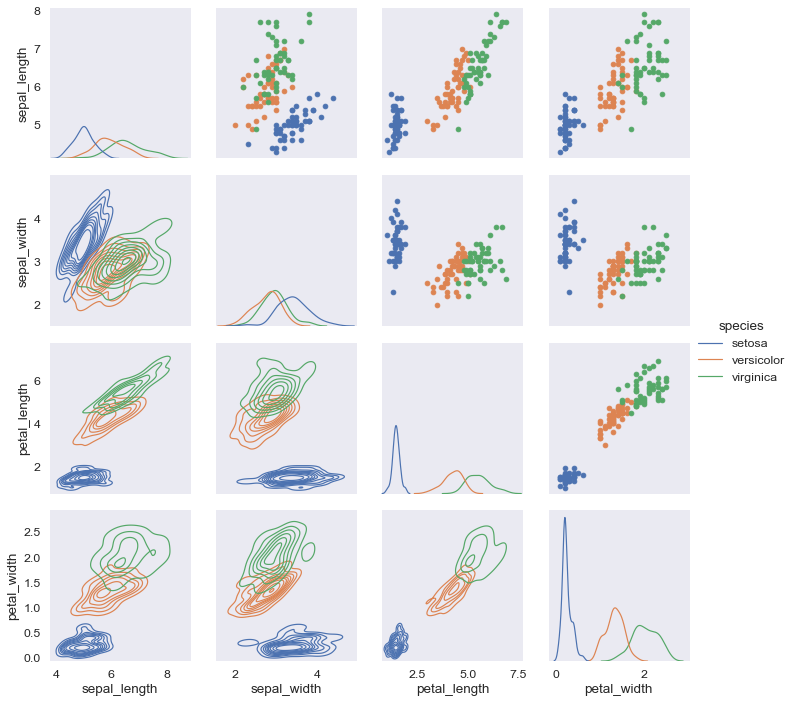

In [46]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
 
iris_g = sns.PairGrid(iris, hue="species")

# Have different plots in upper, lower and diagonal
iris_g.map_upper(plt.scatter)
iris_g.map_lower(sns.kdeplot)
iris_g.map_diag(sns.kdeplot)

# Add a legend last
iris_g.add_legend()

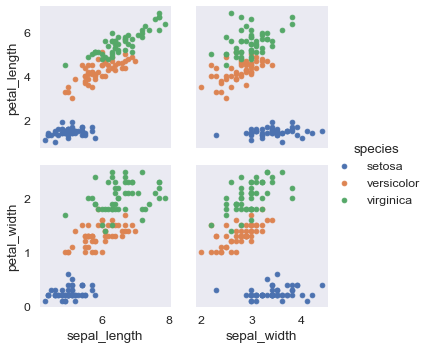

In [47]:
sns.set_context('paper', font_scale=1.4)

# You can define define variables for x & y for a custom grid
iris_g = sns.PairGrid(iris, hue="species",
                      x_vars=["sepal_length", "sepal_width"],
                      y_vars=["petal_length", "petal_width"])

iris_g.map(plt.scatter)
iris_g.add_legend()
plt.show()

## Facet Grid

Multiple plots in a grid for which we define rows and columns.

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

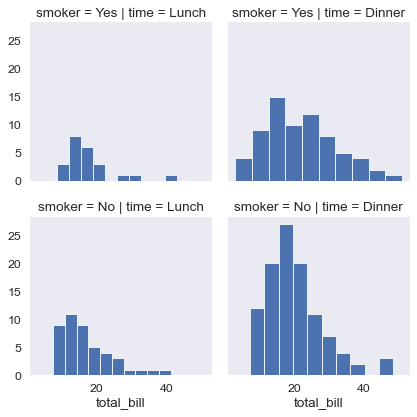

In [48]:
# Get histogram for smokers and non with total bill for lunch & dinner
tips_fg = sns.FacetGrid(tips, col='time', row='smoker')
tips_fg.map(plt.hist, "total_bill")

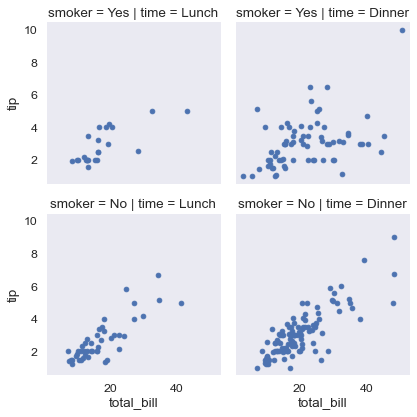

In [49]:
tips_fg = sns.FacetGrid(tips, col='time', row='smoker')
# Create a scatter plot with data on total bill & tip 
tips_fg.map(plt.scatter, "total_bill", "tip")

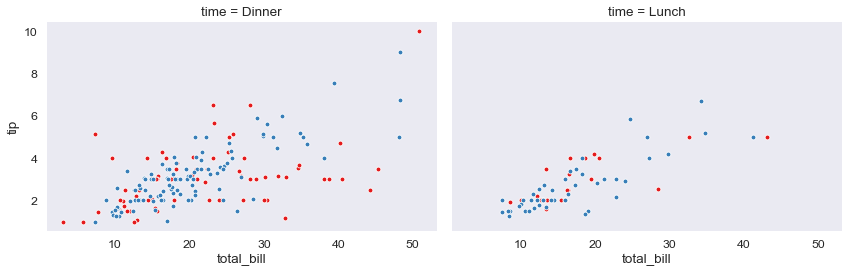

In [50]:
# We can assign variables to different colors and increase size of grid
# Aspect is 1.5 x the size of height
# You can change the order of the columns
# Define the palette used
tips_fg = sns.FacetGrid(tips, col='time', hue='smoker', height=4, aspect=1.5,
                       col_order=['Dinner', 'Lunch'], palette='Set1')
tips_fg.map(plt.scatter, "total_bill", "tip", edgecolor='w')

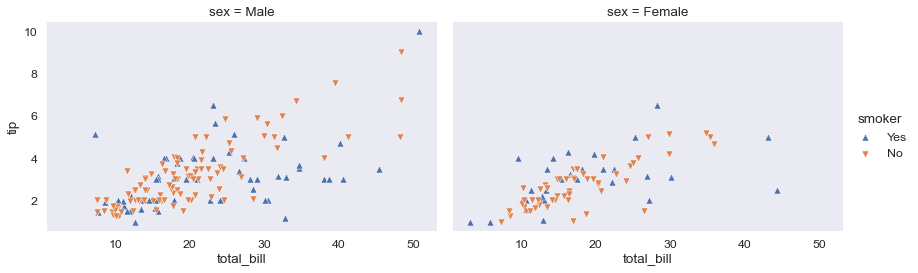

In [51]:
# Define size, linewidth and assign a color of white to markers
kws = dict(s=50, linewidth=.5, edgecolor="w")
# Define that we want to assign different markers to smokers and non
tips_fg = sns.FacetGrid(tips, col='sex', hue='smoker', height=4, aspect=1.5,
                         hue_order=['Yes','No'], 
                         hue_kws=dict(marker=['^', 'v']))
tips_fg.map(plt.scatter, "total_bill", "tip", **kws)
tips_fg.add_legend()

**<p style="color:red">EXERCISE 2</p>**

Create different seaborn plots for the dataset 'attention'.

* Create a facet grid with each the solution scores of each subject. Put each person in their own plot with 5 per line and plot their scores.
* Create a regression plot with data separated by attention attribute (divided vs. focused). You should have two plots here. Check the difference between setting *col="attention"* and *hue="attention"*.

In [56]:
# Your solution here...



## Seaborn Plots for the Canada Immigration Dataset

*Dataset Preparation*

In [52]:
df_canada = pd.read_excel("data/Canada.xlsx", 
                    sheet_name="Canada by Citizenship",
                    skiprows=range(20),
                    skipfooter=2)

# 1. Remove columns that are not necessary
df_canada.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# 2. Rename some columns
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# 3. Column labels should be strings
df_canada.columns = list(map(str, df_canada.columns))

# 4. Set the index to the country column
df_canada.set_index('Country', inplace=True)

# 5. Add an extra column: Total
df_canada['Total'] = df_canada.sum(axis=1, numeric_only = True)

# Create a list of years from 1980 - 2013 as strings
years = list(map(str, range(1980, 2014)))

# Check the data
print('data dimensions:', df_canada.shape)
df_canada.head()

data dimensions: (195, 38)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


*Create a new dataframe that stores that total number of immigrants per year from 1980 to 2013.*

In [53]:
# we can use the sum() method to get the total population per year
df_total = pd.DataFrame(df_canada[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_total.index = map(float, df_total.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# view the final dataframe
df_total.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<AxesSubplot:xlabel='year', ylabel='total'>

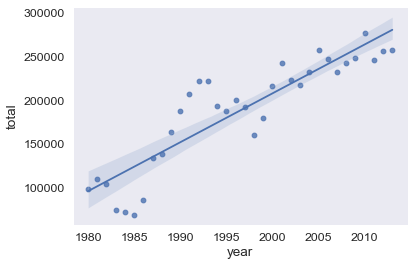

In [54]:
sns.regplot(x='year', y='total', data=df_total)

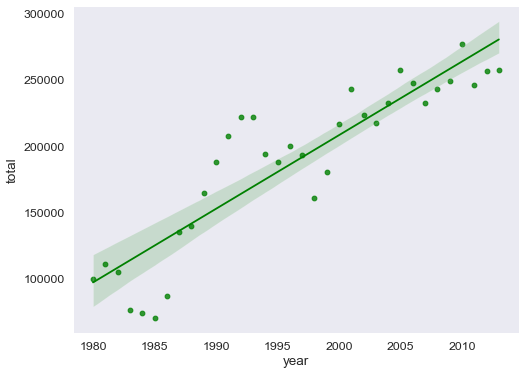

In [55]:
plt.figure(figsize=(8,6))
sns.regplot(x='year', y='total', data=df_total, color='green')
plt.show()

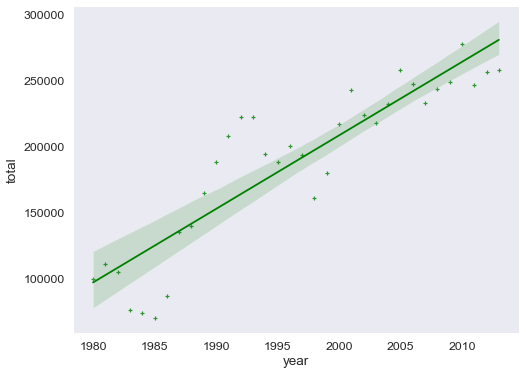

In [56]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+')
plt.show()

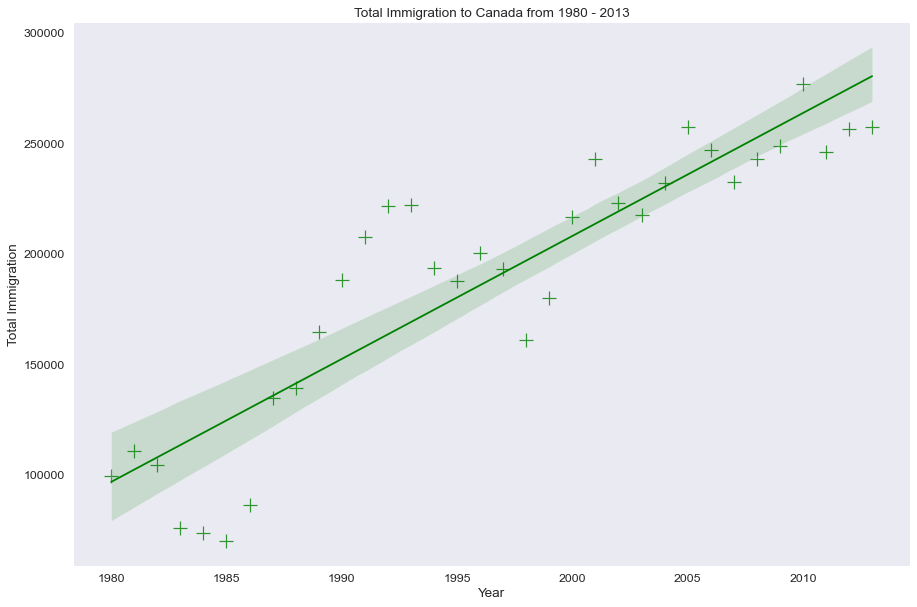

In [57]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title
plt.show()

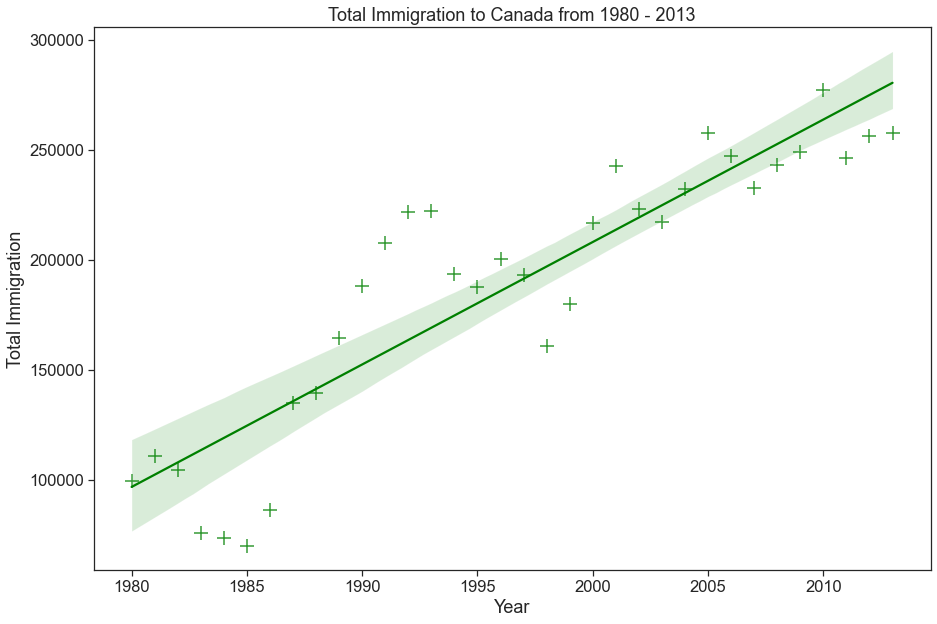

In [58]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks')  # change background to white background
#sns.set_style('whitegrid')  # change background to a white background with gridlines

ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

**<p style="color:red">EXERCISE 3</p>**

Create different seaborn plots for the Canada immigration dataset.

* Create a regression plot for the Romanian immigrants from 1980 to 2013.
* Create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.
* Create any other seaborn plots you consider most interesting.

In [59]:
# Your solution here...

